<a href="https://colab.research.google.com/github/syaoraaann/descriptive_data_mining/blob/main/UAS_DATMIN_DESCRIPTIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


# DETECT DUPLICATE DATA

In [3]:
# Importing pandas
import pandas as pd

# Now you can use pd.read_csv()
df = pd.read_csv('datasets/hcvdat0.csv')

In [4]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('datasets/hcvdat0.csv')

# Mengecek duplikat
print("Duplikat sebelum pembersihan:")
print(df.duplicated().sum())

Duplikat sebelum pembersihan:
0


# DATA CLEANNING

In [5]:
import pandas as pd

# Membaca data
df = pd.read_csv('datasets/hcvdat0.csv')

# Mengecek nilai yang hilang di setiap kolom
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())


Jumlah nilai yang hilang per kolom:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


In [7]:
import pandas as pd

# Membaca data
df = pd.read_csv('datasets/hcvdat0.csv')

# Mengecek nilai yang hilang di setiap kolom
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

df['ALB'] = df['ALB'].fillna(df['ALB'].mean())
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())
df['PROT'] = df['PROT'].fillna(df['PROT'].mean())

df['ALP'] = df['ALP'].fillna(df['ALP'].mean())
df['CHOL'] = df['CHOL'].fillna(df['CHOL'].mean())

print("\nJumlah nilai hilang setelah pembersihan:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

Jumlah nilai hilang setelah pembersihan:
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


In [8]:
import pandas as pd

# Membaca data
df = pd.read_csv('datasets/hcvdat0.csv')

# Mengecek jumlah data hilang per kolom
print(df.isnull().sum())

# Mengisi nilai hilang pada kolom numerik (ALB, ALT, PROT) dengan rata-rata
df['ALB'] = df['ALB'].fillna(df['ALB'].mean())
df['ALT'] = df['ALT'].fillna(df['ALT'].mean())
df['PROT'] = df['PROT'].fillna(df['PROT'].mean())

# Mengisi nilai hilang pada kolom ALP dan CHOL dengan rata-rata atau median
df['ALP'] = df['ALP'].fillna(df['ALP'].mean())  # Atau df['ALP'].median()
df['CHOL'] = df['CHOL'].fillna(df['CHOL'].mean())  # Atau df['CHOL'].median()

# Mengecek kembali setelah penanganan data hilang
print("\nJumlah nilai hilang setelah pembersihan:")
print(df.isnull().sum())

# Menyimpan dataset yang sudah dibersihkan
df.to_csv('datasets/hcvdat0_clean.csv', index=False)

# Menampilkan beberapa baris pertama setelah pembersihan
print(df.head())

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

Jumlah nilai hilang setelah pembersihan:
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

 

# DETECT DATA OUTLIER

In [9]:
import pandas as pd
import seaborn as sn
import numpy as np

df = pd.read_csv("datasets/hcvdat0_clean.csv")
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [12]:
df = pd.read_csv("datasets/hcvdat0_clean.csv")
df.head(10)

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
5,6,0=Blood Donor,32,m,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0
6,7,0=Blood Donor,32,m,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5
7,8,0=Blood Donor,32,m,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1
8,9,0=Blood Donor,32,m,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3
9,10,0=Blood Donor,32,m,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         615 non-null    float64
 5   ALP         615 non-null    float64
 6   ALT         615 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        615 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        615 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [14]:
df.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.775920,25.643955,25.448940,33.090690,19.673150,2.205657,1.123466,49.756166,54.661071,5.398234
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.900000,66.700000,23.000000,25.900000,7.300000,8.260000,5.310000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [19]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[float, int])

# Hitung korelasi
correlation = numeric_df.corr()

# Tampilkan hasil korelasi
print(correlation)


            Unnamed: 0       Age       ALB       ALP       ALT       AST  \
Unnamed: 0    1.000000  0.420477 -0.309379  0.022402 -0.034996  0.332626   
Age           0.420477  1.000000 -0.197005  0.168473 -0.006017  0.088666   
ALB          -0.309379 -0.197005  1.000000 -0.138858  0.001606 -0.193397   
ALP           0.022402  0.168473 -0.138858  1.000000  0.172461  0.062202   
ALT          -0.034996 -0.006017  0.001606  0.172461  1.000000  0.273325   
AST           0.332626  0.088666 -0.193397  0.062202  0.273325  1.000000   
BIL           0.181459  0.032492 -0.221650  0.048600 -0.038468  0.312231   
CHE          -0.270549 -0.075093  0.375848  0.032971  0.146953 -0.208536   
CHOL         -0.085709  0.123978  0.204803  0.121914  0.068023 -0.207507   
CREA         -0.025987 -0.022296 -0.001573  0.149554 -0.043025 -0.021387   
GGT           0.247781  0.153087 -0.155555  0.442262  0.248086  0.491263   
PROT         -0.113735 -0.153665  0.550033 -0.053633  0.094373  0.039888   

           

In [20]:
# Pilih hanya kolom numerik
numeric_df = df.select_dtypes(include=[float, int])

# Hitung korelasi
correlation = numeric_df.corr()


In [25]:
# Mengubah matriks korelasi menjadi DataFrame untuk mempermudah manipulasi
correlation_matrix = correlation.abs().unstack()

# Menghapus korelasi dengan dirinya sendiri (nilai diagonal = 1)
correlation_matrix = correlation_matrix[correlation_matrix < 1]

# Mengurutkan nilai korelasi secara menurun
sorted_correlation = correlation_matrix.sort_values(ascending=False)

# Memilih 4 korelasi tertinggi
top_4_correlation = sorted_correlation.head(4)

# Tampilkan hasil
print(top_4_correlation)


ALB   PROT    0.550033
PROT  ALB     0.550033
AST   GGT     0.491263
GGT   AST     0.491263
dtype: float64


In [22]:
# Mengurutkan korelasi berdasarkan kolom 'Age' secara menurun (descending)
correlation_sorted = correlation["Age"].sort_values(ascending=False)

# Tampilkan hasil
print(correlation_sorted)


Age           1.000000
Unnamed: 0    0.420477
ALP           0.168473
GGT           0.153087
CHOL          0.123978
AST           0.088666
BIL           0.032492
ALT          -0.006017
CREA         -0.022296
CHE          -0.075093
PROT         -0.153665
ALB          -0.197005
Name: Age, dtype: float64


<Axes: >

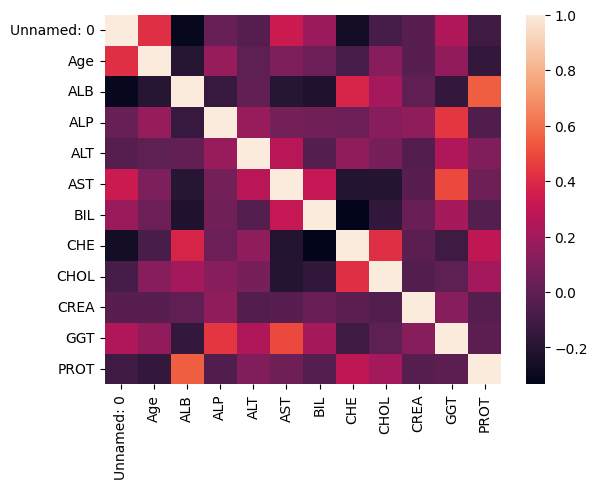

In [23]:
sn.heatmap(correlation)

In [26]:
# Memilih kolom dengan korelasi tertinggi
df_selected = df[['ALP', 'ALT', 'CHE', 'CHOL']]

# Menampilkan DataFrame baru
print(df_selected)

           ALP    ALT    CHE  CHOL
0     52.50000    7.7   6.93  3.23
1     70.30000   18.0  11.17  4.80
2     74.70000   36.2   8.84  5.20
3     52.00000   30.6   7.33  4.74
4     74.10000   32.6   9.15  4.32
..         ...    ...    ...   ...
610  416.60000    5.9   5.57  6.30
611  102.80000    2.9   1.54  3.02
612   87.30000    3.5   1.66  3.63
613   68.28392   39.0   3.56  4.20
614   68.28392  100.0   9.07  5.30

[615 rows x 4 columns]


<Axes: xlabel='ALP'>

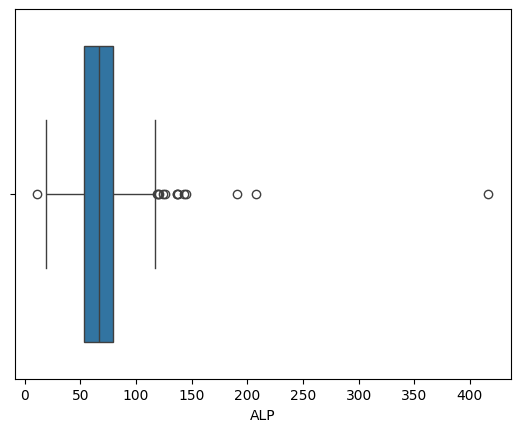

In [27]:
#detect data oulier in Pregnancies Column
sn.boxplot(x = 'ALP', data = df)

<Axes: xlabel='ALT'>

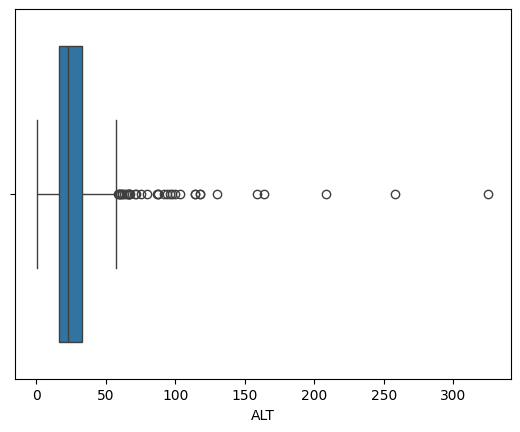

In [28]:
sn.boxplot(x = 'ALT', data = df)

<Axes: xlabel='CHE'>

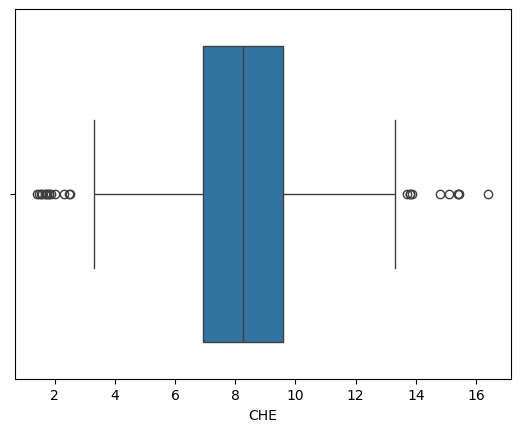

In [29]:
sn.boxplot(x = 'CHE', data = df)

<Axes: xlabel='CHOL'>

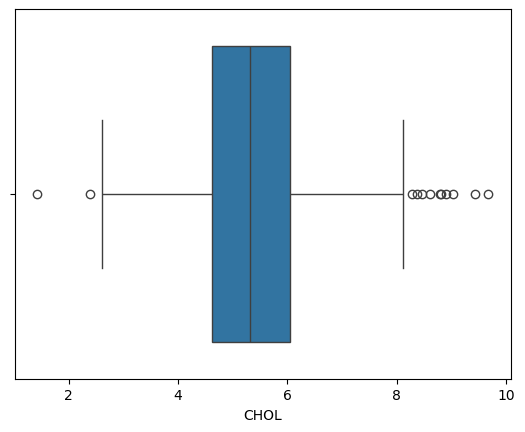

In [30]:
sn.boxplot(x = 'CHOL', data = df)

In [31]:
def detect_outlier(column_name):
  q1, q3 = np.percentile(df[column_name], [25,75])
  iqr = q3 - q1

  lower_bound = q1 -(1.5 * iqr)
  upper_bound = q3 +(1.5 * iqr)
  return lower_bound, upper_bound

In [33]:
#detect_outlier for column 'Pregnancies'
lower_alp, upper_alp = detect_outlier('ALP')
lower_alp, upper_alp
df_alp = df[(df['ALP'] < lower_alp)|(df['ALP']>upper_alp)]
df_alp

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
66,67,0=Blood Donor,37,m,40.8,118.9,17.2,19.2,3.2,9.17,4.260000,88.0,13.5,72.0
118,119,0=Blood Donor,43,m,39.7,126.0,21.9,28.9,16.2,8.48,5.300000,114.0,21.4,80.3
205,206,0=Blood Donor,50,m,42.2,145.0,27.5,37.9,4.5,13.71,8.800000,103.0,239.0,73.1
231,232,0=Blood Donor,53,m,44.8,119.7,29.2,20.7,6.0,13.80,8.780000,64.0,49.3,75.4
329,330,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,5.368099,48.0,25.7,74.4
438,439,0=Blood Donor,49,f,38.8,120.2,25.2,21.5,12.0,8.29,7.110000,52.0,18.6,70.7
458,459,0=Blood Donor,51,f,41.4,136.9,33.2,20.0,5.0,10.27,6.240000,77.0,106.7,72.2
533,534,0s=suspect Blood Donor,47,m,22.5,124.0,79.5,46.7,2.3,6.83,4.300000,170.0,345.6,58.6
539,540,0s=suspect Blood Donor,59,f,19.3,208.2,325.3,146.6,6.9,5.33,4.720000,32.0,295.6,53.1
586,587,3=Cirrhosis,39,m,34.0,137.8,4.8,35.6,9.0,3.65,4.820000,519.0,133.4,57.5


In [34]:
lower_alt, upper_alt = detect_outlier('ALT')
lower_alt, upper_alt
df_alt = df[(df['ALT'] < lower_alt)|(df['ALT']>upper_alt)]
df_alt

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
23,24,0=Blood Donor,34,m,43.4,46.10000,97.8,46.2,11.3,7.99,3.620000,71.0,35.3,69.600000
45,46,0=Blood Donor,36,m,41.7,77.20000,103.6,46.9,10.4,12.21,5.630000,88.0,20.9,69.300000
64,65,0=Blood Donor,37,m,33.9,64.00000,91.7,44.7,9.1,8.35,5.400000,95.0,30.3,74.700000
65,66,0=Blood Donor,37,m,42.9,61.80000,96.1,44.1,9.6,7.82,5.100000,82.0,32.3,69.300000
71,72,0=Blood Donor,38,m,39.9,62.90000,71.7,43.9,10.4,10.90,7.010000,99.0,88.3,73.100000
78,79,0=Blood Donor,38,m,38.3,81.50000,65.9,35.3,14.0,11.00,5.460000,80.0,45.2,68.100000
84,85,0=Blood Donor,39,m,43.9,90.10000,87.9,60.6,8.6,9.94,4.640000,98.0,99.3,66.200000
94,95,0=Blood Donor,40,m,41.4,67.50000,59.8,36.8,7.3,4.18,6.020000,76.0,92.7,72.500000
114,115,0=Blood Donor,42,m,46.9,68.70000,118.1,49.3,20.2,7.93,5.620000,86.0,74.9,73.800000
140,141,0=Blood Donor,45,m,36.2,102.60000,70.8,40.3,14.5,8.69,5.980000,94.0,80.6,66.600000


In [35]:
lower_che, upper_che = detect_outlier('CHE')
lower_che, upper_che
df_che = df[(df['CHE'] < lower_che)|(df['CHE']>upper_che)]
df_che

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
91,92,0=Blood Donor,39,m,46.1,77.10000,34.9,37.6,4.1,13.86,8.110000,94.0,76.9,71.100000
108,109,0=Blood Donor,42,m,45.3,55.30000,31.0,50.0,18.5,15.43,5.880000,83.0,15.4,72.400000
183,184,0=Blood Donor,48,m,42.6,69.10000,17.6,28.3,7.7,15.40,5.070000,81.0,29.9,77.800000
205,206,0=Blood Donor,50,m,42.2,145.00000,27.5,37.9,4.5,13.71,8.800000,103.0,239.0,73.100000
209,210,0=Blood Donor,51,m,42.6,69.10000,17.6,28.3,7.7,15.40,5.070000,81.0,29.9,77.800000
231,232,0=Blood Donor,53,m,44.8,119.70000,29.2,20.7,6.0,13.80,8.780000,64.0,49.3,75.400000
235,236,0=Blood Donor,53,m,49.2,71.80000,42.8,29.4,6.8,15.10,6.240000,107.0,48.3,77.800000
536,537,0s=suspect Blood Donor,55,m,47.3,106.00000,208.8,130.6,0.8,14.80,8.080000,76.0,71.6,78.300000
548,549,1=Hepatitis,32,m,41.0,34.40000,12.1,60.9,6.0,13.80,5.480000,45.4,33.1,71.100000
555,556,1=Hepatitis,46,m,48.0,59.50000,11.6,39.0,7.0,16.41,4.650000,66.4,158.2,72.700000


In [36]:
lower_chol, upper_chol = detect_outlier('CHOL')
lower_chol, upper_chol
df_chol = df[(df['CHOL'] < lower_chol)|(df['CHOL']>upper_chol)]
df_chol

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
89,90,0=Blood Donor,39,m,46.4,102.9,44.4,26.2,4.1,9.29,8.89,103.0,64.0,72.2
116,117,0=Blood Donor,42,m,46.2,57.7,35.6,22.9,14.8,11.01,8.60,80.0,70.1,77.5
125,126,0=Blood Donor,43,m,42.8,76.9,57.7,33.0,11.3,9.63,9.43,72.0,23.3,72.9
184,185,0=Blood Donor,48,m,46.4,64.1,29.3,27.6,13.2,10.07,8.28,98.0,28.9,83.3
205,206,0=Blood Donor,50,m,42.2,145.0,27.5,37.9,4.5,13.71,8.80,103.0,239.0,73.1
231,232,0=Blood Donor,53,m,44.8,119.7,29.2,20.7,6.0,13.80,8.78,64.0,49.3,75.4
382,383,0=Blood Donor,43,f,39.0,83.1,21.3,18.8,3.5,12.80,9.03,58.0,22.7,73.1
440,441,0=Blood Donor,49,f,39.1,89.4,15.4,24.1,4.1,10.03,8.36,74.0,12.0,68.1
499,500,0=Blood Donor,57,f,41.2,83.5,32.6,39.3,4.0,10.67,8.46,69.0,22.4,75.7
553,554,1=Hepatitis,41,m,42.0,39.6,26.5,77.6,42.0,9.67,9.67,57.7,143.4,75.8


In [37]:
# Memilih kolom dengan korelasi tertinggi
df_selected = df[['ALP', 'ALT', 'CHE', 'CHOL']]
df_selected

,ALP,ALT,CHE,CHOL
0,52.50000,7.7,6.93,3.23
1,70.30000,18.0,11.17,4.80
2,74.70000,36.2,8.84,5.20
3,52.00000,30.6,7.33,4.74
4,74.10000,32.6,9.15,4.32
...,...,...,...,...
610,416.60000,5.9,5.57,6.30
611,102.80000,2.9,1.54,3.02
612,87.30000,3.5,1.66,3.63
613,68.28392,39.0,3.56,4.20


In [38]:
dfi_alp = df_alp.index.tolist()
dfi_alp

[66, 118, 205, 231, 329, 438, 458, 533, 539, 586, 589, 598, 606, 610]

In [39]:
dfi_alt = df_alt.index.tolist()
dfi_alt

[23,
 45,
 64,
 65,
 71,
 78,
 84,
 94,
 114,
 140,
 144,
 156,
 182,
 194,
 227,
 260,
 431,
 452,
 462,
 533,
 536,
 539,
 541,
 543,
 546,
 568,
 569,
 570,
 576,
 577,
 582,
 584,
 585,
 590,
 592,
 614]

In [40]:
dfi_che = df_che.index.tolist()
dfi_che

[91,
 108,
 183,
 205,
 209,
 231,
 235,
 536,
 548,
 555,
 587,
 589,
 590,
 593,
 595,
 596,
 597,
 599,
 600,
 601,
 604,
 605,
 611,
 612]

In [41]:
dfi_chol = df_chol.index.tolist()
dfi_chol

[89, 116, 125, 184, 205, 231, 382, 440, 499, 553, 596, 597]

In [42]:
index_to_remove= list(set(dfi_alp) | set(dfi_alt) | set(dfi_che) | set(dfi_chol))
index_to_remove

[260,
 533,
 23,
 536,
 539,
 541,
 543,
 546,
 548,
 553,
 555,
 45,
 568,
 569,
 570,
 64,
 65,
 66,
 576,
 577,
 582,
 71,
 584,
 329,
 586,
 587,
 585,
 589,
 78,
 590,
 592,
 593,
 595,
 84,
 596,
 598,
 597,
 599,
 600,
 601,
 91,
 604,
 605,
 606,
 94,
 89,
 610,
 611,
 612,
 614,
 108,
 114,
 116,
 118,
 125,
 382,
 140,
 144,
 156,
 431,
 438,
 182,
 183,
 440,
 184,
 194,
 452,
 458,
 205,
 462,
 209,
 227,
 231,
 235,
 499]

In [43]:
#data cleanned
df_cleaned = df.drop(index_to_remove)
df_cleaned

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.500000,52.50000,7.7,22.1,7.5,6.93,3.230000,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.500000,70.30000,18.0,24.7,3.9,11.17,4.800000,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.900000,74.70000,36.2,52.6,6.1,8.84,5.200000,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.200000,52.00000,30.6,22.6,18.9,7.33,4.740000,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.200000,74.10000,32.6,24.8,9.6,9.15,4.320000,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,3=Cirrhosis,65,m,41.620195,68.28392,40.0,54.0,13.0,7.50,5.368099,70.0,107.0,79.0
607,608,3=Cirrhosis,52,f,39.000000,37.00000,1.3,30.4,21.0,6.33,3.780000,158.2,142.5,82.7
608,609,3=Cirrhosis,58,f,34.000000,46.40000,15.0,150.0,8.0,6.26,3.980000,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.000000,51.30000,19.6,285.8,40.0,5.77,4.510000,136.1,101.1,70.5


In [44]:
df_cleaned.to_csv("datasets/hcvdat0_clean_outlier.csv")

# DESCRIPTIVE DATA MINING

In [45]:
import pandas as pd

# Memuat data CSV
data = pd.read_csv('datasets/hcvdat0_clean_outlier.csv')

# Menampilkan 5 baris pertama dari dataset
print(data.head())


   Unnamed: 0.1  Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST  \
0             0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   
1             1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   
2             2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   
3             3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6   
4             4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   

    BIL    CHE  CHOL   CREA   GGT  PROT  
0   7.5   6.93  3.23  106.0  12.1  69.0  
1   3.9  11.17  4.80   74.0  15.6  76.5  
2   6.1   8.84  5.20   86.0  33.2  79.3  
3  18.9   7.33  4.74   80.0  33.8  75.7  
4   9.6   9.15  4.32   76.0  29.9  68.7  


In [46]:
# Melihat informasi umum tentang dataset
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

# Melihat nama kolom dalam dataset
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  540 non-null    int64  
 1   Unnamed: 0    540 non-null    int64  
 2   Category      540 non-null    object 
 3   Age           540 non-null    int64  
 4   Sex           540 non-null    object 
 5   ALB           540 non-null    float64
 6   ALP           540 non-null    float64
 7   ALT           540 non-null    float64
 8   AST           540 non-null    float64
 9   BIL           540 non-null    float64
 10  CHE           540 non-null    float64
 11  CHOL          540 non-null    float64
 12  CREA          540 non-null    float64
 13  GGT           540 non-null    float64
 14  PROT          540 non-null    float64
dtypes: float64(10), int64(3), object(2)
memory usage: 63.4+ KB
None
       Unnamed: 0.1  Unnamed: 0         Age         ALB         ALP  \
count    540.000000  540

In [47]:
# Menghitung jumlah nilai yang hilang di setiap kolom
print(data.isnull().sum())


Unnamed: 0.1    0
Unnamed: 0      0
Category        0
Age             0
Sex             0
ALB             0
ALP             0
ALT             0
AST             0
BIL             0
CHE             0
CHOL            0
CREA            0
GGT             0
PROT            0
dtype: int64


In [48]:
# Menghitung frekuensi nilai pada kolom tertentu
print(data['ALP'].value_counts())

ALP
68.28392    6
52.50000    5
61.20000    5
84.10000    4
66.50000    3
           ..
89.00000    1
48.80000    1
67.20000    1
89.40000    1
46.40000    1
Name: count, Length: 378, dtype: int64


<Axes: >

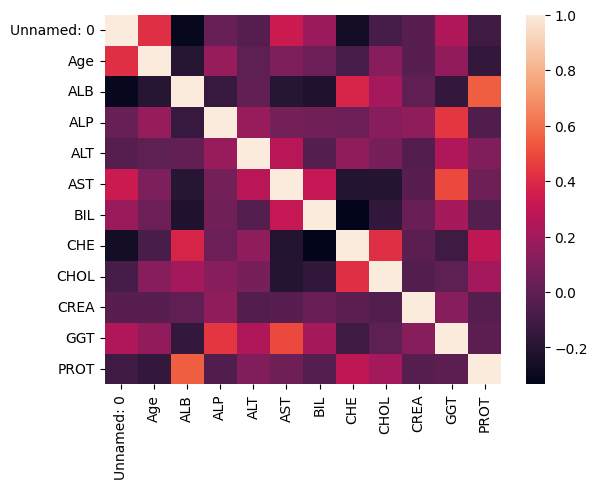

In [51]:
sn.heatmap(correlation)

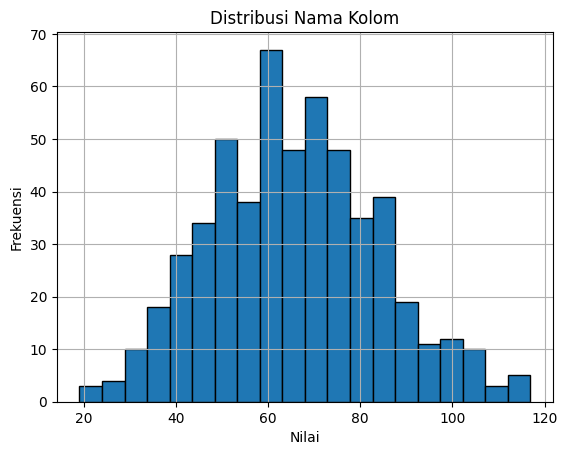

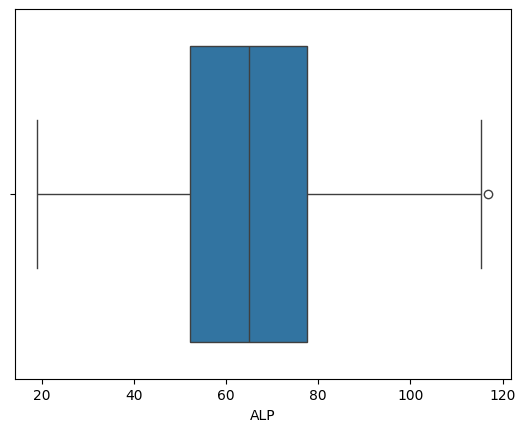

In [52]:
import matplotlib.pyplot as plt

# Visualisasi distribusi data pada kolom tertentu
data['ALP'].hist(bins=20, edgecolor='black')
plt.title('Distribusi Nama Kolom')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outliers
sns.boxplot(x=data['ALP'])
plt.show()
